# Course Progression Dashboard

### Imports

In [1]:
#data wrangling
import pyodbc
import numpy as np
import pandas as pd

#data viz
import matplotlib.pyplot as plt
import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc
import plotly.express as px
import plotly.graph_objects as go

# modelling
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB, ComplementNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit

print('imports loaded')

imports loaded


### Read Excel

In [2]:
file_name='N:/SRDStaff/GPS/SPI/Insight/Work Clusters/Student Enrolment and Retention/Retention/Retention Reporting from Enrolment Stats/Retention Reporting Data TEST.xlsx'

df=pd.read_excel(file_name)

In [3]:
pd.set_option('display.max_columns', None)

In [ ]:
df

## Modelling

In [ ]:
df.columns.tolist()

### One Hot Encoder

In [4]:
table = df[['Postcode_LocalAuthority','Student_Gender','Student_AgeOnEntryGroup','Student_EntryQual','Student_NewCont','SCE_STAC','Student_Religion','Course_College_Short_Latest','Student_YoungMature','Student_Disability','Course_Department_Latest','Postcode_POLAR4_Quintile','Student_Ethnicity','Student_EthnicityGroup','Student_Commuter','Student_Carer','Student_Clearing','Student_DirectEntrant','Student_MilitaryFamily','Progressed Flag']]

# Encode data as a binary
# Create the one hot encoder - we use the drop = 'if_binary' to drop any columns with just 2 values in
enc = OneHotEncoder(handle_unknown='error',drop = 'if_binary')
# fit our data to it
enc.fit(table)
# transform our data
encoded_arr = enc.transform(table).toarray()

# turn the encoded data into a dataframe
training_df = pd.DataFrame(encoded_arr)
training_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

### Train/test split

In [10]:
# Need to make all of our dataframes into numpy arrays
X = np.array(training_df.iloc[:,:-1])
y = np.array(training_df.iloc[:,-1])

# training test split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, val_index in split.split(X, y):
    X_train, X_test = X[train_index], X[val_index]  
    y_train, y_test = y[train_index], y[val_index]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

### Neural Network

C:\Users\bv6066\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



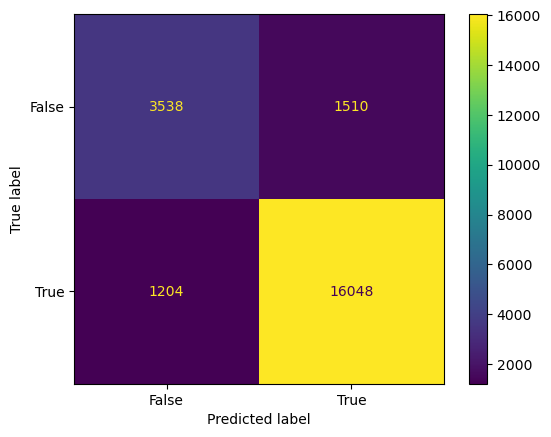

Accuracy: 0.8782959641255605
Precision: 0.91399931655086
Sensitivity: 0.9302109900301414
Specificity: 0.7008716323296355
F1 Score: 0.9220338983050848


In [11]:
# Neural network model
mlpc=MLPClassifier()
# fit data to it
mlpc.fit(X_train,y_train)
# create a prediction
y_predict = mlpc.predict(X_test)

#create the confusion matrix
conf_mtrx = confusion_matrix(y_test,y_predict)
# display our confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mtrx, display_labels = [False, True])
cm_display.plot()
plt.show()

# How often the model is correct
Accuracy = metrics.accuracy_score(y_test, y_predict)
# The percentage of true positives
Precision = metrics.precision_score(y_test, y_predict)
# How good is model at predicting positives
Sensitivity_recall = metrics.recall_score(y_test, y_predict)
# How good is model at predicting negatives
Specificity = metrics.recall_score(y_test, y_predict, pos_label=0)
# F1 score - "harmonic mean" of precision and sensitivity
F1_score = metrics.f1_score(y_test, y_predict)

print('Accuracy: {0}\nPrecision: {1}\nSensitivity: {2}\nSpecificity: {3}\nF1 Score: {4}'.format(Accuracy,Precision,Sensitivity_recall,Specificity,F1_score))

## Dashboard

In [9]:
import dash
from dash import dcc, html
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objs as go

# Setting Up the Dash App
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.CERULEAN])


#Build Components
title = dcc.Markdown(children='# Course Progression Dashboard')
subtitle = dcc.Markdown(children='###### How are students progressing from one year of their course to the next?')
filter1list = dcc.Checklist(
                id='chart-visibility',
                options=[{'label': ' Chart 1 ', 'value': 'chart1'}, {'label': ' Chart 2 ', 'value': 'chart2'}],
                value=['chart1', 'chart2'],
                inline=True
            )
filter1title = dcc.Markdown(children='###### Show/hide charts')
filter1card = dbc.Card(dbc.CardBody(
                                    [filter1title,filter1list]
                                   )
                      )

filter2drop = dcc.Dropdown(
                id='level-filter',
                options=[
  {
    "label": "L5-L6",
    "value": "L5-L6"
  },
  {
    "label": "L4-L5",
    "value": "L4-L5"
  },
  {
    "label": "L6P-L6",
    "value": "L6P-L6"
  },
  {
    "label": "L3-L4",
    "value": "L3-L4"
  },
  {
    "label": "L6-L7",
    "value": "L6-L7"
  },
  {
    "label": "All",
    "value": "All"
  }
                        ],
                value="All",
                multi=False
            )
filter2title = dcc.Markdown(children='###### Filter AYR Progress')
filter2card = dbc.Card(dbc.CardBody(
                                    [filter2title,filter2drop]
                                    )
                      )
tbox1 = dbc.Card(dbc.CardBody(
                                dcc.Markdown(children='This is a text box for the first chart')
                             )
                )
tbox2 = dbc.Card(dbc.CardBody(
                                dcc.Markdown(children='This is a text box for the second chart')
                             )
                )
graph1 = dbc.Card(dbc.CardBody(
                                dcc.Graph(id='graph-1', figure={})
                              )
                 )
graph2 = dbc.Card(dbc.CardBody(
                                dcc.Graph(id='graph-2', figure={})
                              )
                 )


# Define the layout of the app
app.layout = dbc.Container([
    
    # Title & subtitle
    dbc.Row(dbc.Col([title], width=8), justify='center'),
    dbc.Row(dbc.Col([subtitle], width=8), justify='center'),

 
    # Filters row
    dbc.Row([
        dbc.Col([filter1card]),
        dbc.Col([filter2card])
    ], className='mb-4'),

    # First chart row
    dbc.Row([
        dbc.Col([tbox1]),
        dbc.Col([graph1], id='chart1-container', width=9)
    ], className='mb-4'),

    # Second chart row
    dbc.Row([
        dbc.Col([tbox2]),
        dbc.Col([graph2], id='chart2-container', width=9)
    ])
], fluid=True)

# Callbacks in Dash
@app.callback(
    [Output('chart1-container', 'style'), Output('chart2-container', 'style')],
    [Input('chart-visibility', 'value')]
)
def toggle_charts(visibility):
    chart1_style = {'display': 'block'} if 'chart1' in visibility else {'display': 'none'}
    chart2_style = {'display': 'block'} if 'chart2' in visibility else {'display': 'none'}
    return chart1_style, chart2_style

@app.callback(
    [Output('graph-1', 'figure'), Output('graph-2', 'figure')],
    [Input('level-filter', 'value')]
)
def filter_level(selected_value):
    if selected_value == "All":
        filtered_df = df
    else: 
        filtered_df = df[df['UG FT Progress Level'] == selected_value]
    
    # Group by 'AYR Progress' and count the total records in each group
    total_counts = filtered_df.groupby(['AYR Progress']).size().reset_index(name='total_count')

    # Filter the DataFrame where 'Progressed Flag' is 'PROGRESSED'
    progressed_df = filtered_df[filtered_df['Progressed Flag'] == 'PROGRESSED']

    # Group by 'AYR Progress' and count the number of 'PROGRESSED' records
    progressed_counts = progressed_df.groupby(['AYR Progress']).size().reset_index(name='progressed_count')

    # Merge the total counts and progressed counts DataFrames
    merged_df = pd.merge(total_counts, progressed_counts, on=['AYR Progress'])

    # Calculate the percentage of 'PROGRESSED' records within each group
    merged_df['percentage'] = (merged_df['progressed_count'] / merged_df['total_count']) * 100
 
    
    # Create graphs
    fig1 = px.bar(merged_df, x='AYR Progress', y='percentage', labels={'percentage': 'Percentage'}, title='AYR Progress vs Percentage')
    fig1 = go.Figure(fig1)
    fig1.add_trace(go.Scatter(x=merged_df['AYR Progress'], y=merged_df['total_count'], name='Total Count', yaxis='y2', mode='lines+markers', line=dict(color='firebrick')))
    fig1.update_layout(yaxis=dict(range=[0,100]),yaxis2=dict(title='Total Count', overlaying='y', side='right', range=[0, merged_df['total_count'].max() * 1.2]), title=dict(x=0.5), plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(255,255,255, 0.9)', margin=dict(l=50, r=50, t=50, b=50))
    fig1.data[0].update(hovertemplate='%{x}: %{y:.2f}%<extra></extra>')
    fig1.data[1].update(hovertemplate='%{x}: %{y}<extra></extra>')

    fig2 = px.bar(merged_df, x='AYR Progress', y='progressed_count', labels={'progressed_count': 'Progressed Count'}, title='AYR Progress vs Progressed Count')
    fig2 = go.Figure(fig2)
    fig2.add_trace(go.Scatter(x=merged_df['AYR Progress'], y=merged_df['total_count'], name='Total Count', yaxis='y2', mode='lines+markers', line=dict(color='darkblue')))
    fig2.update_layout(yaxis=dict(range=[0,20000]), yaxis2=dict(title='Total Count', overlaying='y', side='right', range=[0, merged_df['total_count'].max() * 1.2]), title=dict(x=0.5), plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(255,255,255, 0.9)', margin=dict(l=50, r=50, t=50, b=50))
    fig2.data[0].update(hovertemplate='%{x}: %{y:.2f}<extra></extra>')
    fig2.data[1].update(hovertemplate='%{x}: %{y}<extra></extra>')

    return fig1, fig2


# Running the Dash App
if __name__ == '__main__':
    app.run_server(debug=True)